In [19]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import os
import face_recognizer


In [20]:
path_train = './Data/Yale faces/Cropped'
data = []
labels = []

shape = (0, 0)
i = 0
for f in os.listdir(path_train):
	if not f.startswith('.'):
		img = Image.open(os.path.join(path_train, f))
		img = np.array(img)
		if img.ndim == 3:
			img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
		shape = img.shape
		data.append(img.flatten())
		labels.append(f.split('.')[0])
		i += 1

data = np.array(data)

In [21]:
recognizer = face_recognizer.FaceRecognizer()

recognizer.train(data, labels)

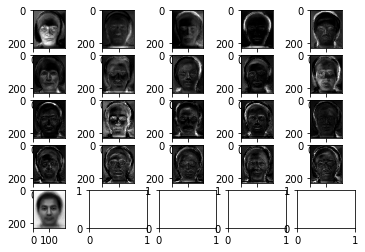

In [22]:
eigVecs = recognizer.getEigVecs()

_, plts = plt.subplots(5, 5)

eigImgs = []
for i, vec in enumerate(eigVecs.transpose()):
	eigVec = np.real(vec)
	maax = np.max(eigVec)
	miin = np.min(eigVec)
	eigVec = eigVec * 255 * (eigVec - miin) / (maax - miin)
	eigImg = eigVec.astype(np.int32).reshape(shape)
	plts[i / 5][i % 5].imshow(eigImg, 'gray')
	eigImgs.append(eigImg)

plts[4][0].imshow(recognizer.getAvg().reshape(shape), 'gray')

plt.show()
